In [14]:
import pandas as pd
import numpy as np
from pathlib import Path
#D:\Documents\DigitalEngineering\DatasciencewithPython\dswp_group2\raw_data\opsd-time_series-2020-10-06
file_path = Path("raw_data/time_series_60min_singleindex.csv")

# df = pd.read_csv(
#     DATA_DIR / "time_series_60min_singleindex.csv",
#     parse_dates=["utc_timestamp"]
# )



# print(df.shape)
# print(df.columns[:20])

df_raw = pd.read_csv(
    file_path,
    parse_dates=["utc_timestamp"],  # let pandas parse this as datetime
    #infer_datetime_format=True
)

print(df_raw.shape)
print(df_raw.dtypes[["utc_timestamp", "cet_cest_timestamp"]])
print(df_raw.head(3))


(50401, 300)
utc_timestamp         datetime64[ns, UTC]
cet_cest_timestamp                 object
dtype: object
              utc_timestamp        cet_cest_timestamp  \
0 2014-12-31 23:00:00+00:00  2015-01-01T00:00:00+0100   
1 2015-01-01 00:00:00+00:00  2015-01-01T01:00:00+0100   
2 2015-01-01 01:00:00+00:00  2015-01-01T02:00:00+0100   

   AT_load_actual_entsoe_transparency  AT_load_forecast_entsoe_transparency  \
0                                 NaN                                   NaN   
1                              5946.0                                6701.0   
2                              5726.0                                6593.0   

   AT_price_day_ahead  AT_solar_generation_actual  \
0                 NaN                         NaN   
1                35.0                         NaN   
2                45.0                         NaN   

   AT_wind_onshore_generation_actual  BE_load_actual_entsoe_transparency  \
0                                NaN                  

In [2]:
# missing_ts_count = df_raw["utc_timestamp"].isna().sum()
# print(f"Missing utc_timestamp rows: {missing_ts_count}")

Missing utc_timestamp rows: 0


In [15]:
df = df_raw.set_index("utc_timestamp").sort_index()

print(df.index.is_monotonic_increasing)  # should be True
print(df.index.min(), df.index.max())


True
2014-12-31 23:00:00+00:00 2020-09-30 23:00:00+00:00


In [3]:
# duplicated_ts_count = df_raw["utc_timestamp"].duplicated().sum()
# print(f"Duplicated utc timestamps rows :{duplicated_ts_count}")

Duplicated utc timestamps rows :0


In [4]:
# ts_min = df_raw["utc_timestamp"].min()
# ts_max = df_raw["utc_timestamp"].max()
# print(f"Time range: {ts_min}  ->  {ts_max}")

Time range: 2014-12-31 23:00:00+00:00  ->  2020-09-30 23:00:00+00:00


In [5]:
# df = df_raw.copy()

In [6]:
# df = df.sort_values("utc_timestamp")

In [7]:
# df = df.drop_duplicates(subset=["utc_timestamp"], keep="first")

# print(df.shape)

(50401, 300)


In [8]:
# df = df.set_index("utc_timestamp")


In [10]:
# df = df.sort_index()

# print(df.index.is_monotonic_increasing)  # should be True
# print(df.index[:10])

True
DatetimeIndex(['2014-12-31 23:00:00+00:00', '2015-01-01 00:00:00+00:00',
               '2015-01-01 01:00:00+00:00', '2015-01-01 02:00:00+00:00',
               '2015-01-01 03:00:00+00:00', '2015-01-01 04:00:00+00:00',
               '2015-01-01 05:00:00+00:00', '2015-01-01 06:00:00+00:00',
               '2015-01-01 07:00:00+00:00', '2015-01-01 08:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='utc_timestamp', freq=None)


In [11]:
# time_diffs = df.index.to_series().diff()

In [12]:
# print(time_diffs.value_counts().head())

utc_timestamp
0 days 01:00:00    50400
Name: count, dtype: int64


In [16]:
time_diffs = df.index.to_series().diff()
print(time_diffs.value_counts().head())


utc_timestamp
0 days 01:00:00    50400
Name: count, dtype: int64


In [17]:
de_cols = ["cet_cest_timestamp"] + [c for c in df.columns if c.startswith("DE_")]
de = df[de_cols].copy()
de.index.name = "utc_timestamp"  


In [20]:
print(de.shape)
print(de.columns[:42])
print(de.index[:3])

(50401, 42)
Index(['cet_cest_timestamp', 'DE_load_actual_entsoe_transparency',
       'DE_load_forecast_entsoe_transparency', 'DE_solar_capacity',
       'DE_solar_generation_actual', 'DE_solar_profile', 'DE_wind_capacity',
       'DE_wind_generation_actual', 'DE_wind_profile',
       'DE_wind_offshore_capacity', 'DE_wind_offshore_generation_actual',
       'DE_wind_offshore_profile', 'DE_wind_onshore_capacity',
       'DE_wind_onshore_generation_actual', 'DE_wind_onshore_profile',
       'DE_50hertz_load_actual_entsoe_transparency',
       'DE_50hertz_load_forecast_entsoe_transparency',
       'DE_50hertz_solar_generation_actual',
       'DE_50hertz_wind_generation_actual',
       'DE_50hertz_wind_offshore_generation_actual',
       'DE_50hertz_wind_onshore_generation_actual',
       'DE_LU_load_actual_entsoe_transparency',
       'DE_LU_load_forecast_entsoe_transparency', 'DE_LU_price_day_ahead',
       'DE_LU_solar_generation_actual', 'DE_LU_wind_generation_actual',
       'DE_LU_wi

In [21]:
de = de.drop(columns=["cet_cest_timestamp"])


In [22]:
print("Duplicate timestamps:", de.index.duplicated().sum())


Duplicate timestamps: 0


In [23]:
missing_frac = de.isna().mean().sort_values(ascending=False)
print(missing_frac)


DE_LU_load_forecast_entsoe_transparency            0.669530
DE_LU_load_actual_entsoe_transparency              0.652308
DE_LU_solar_generation_actual                      0.652011
DE_LU_price_day_ahead                              0.651991
DE_LU_wind_generation_actual                       0.651872
DE_LU_wind_offshore_generation_actual              0.651872
DE_LU_wind_onshore_generation_actual               0.651872
DE_solar_profile                                   0.133033
DE_wind_profile                                    0.132458
DE_wind_offshore_profile                           0.132458
DE_wind_onshore_profile                            0.132418
DE_wind_offshore_capacity                          0.130970
DE_wind_onshore_capacity                           0.130970
DE_solar_capacity                                  0.130970
DE_wind_capacity                                   0.130970
DE_solar_generation_actual                         0.002063
DE_wind_generation_actual               

In [25]:
drop_patterns = [
    "DE_LU_",          # DE-LU bidding zone
    "DE_50hertz_",     # TSO/control area
    "DE_amprion_",
    "DE_tennet_",
    "DE_transnetbw_",
]

# 4) Figure out which columns to drop
cols_to_drop = [c for c in de.columns if any(pat in c for pat in drop_patterns)]

# 5) Keep purely country-level Germany columns
de_country = de.drop(columns=cols_to_drop)

# 6)Check what we have now
print(de_country.columns)
print(de_country.index.name)
print(de_country.head(5))

Index(['DE_load_actual_entsoe_transparency',
       'DE_load_forecast_entsoe_transparency', 'DE_solar_capacity',
       'DE_solar_generation_actual', 'DE_solar_profile', 'DE_wind_capacity',
       'DE_wind_generation_actual', 'DE_wind_profile',
       'DE_wind_offshore_capacity', 'DE_wind_offshore_generation_actual',
       'DE_wind_offshore_profile', 'DE_wind_onshore_capacity',
       'DE_wind_onshore_generation_actual', 'DE_wind_onshore_profile'],
      dtype='object')
utc_timestamp
                           DE_load_actual_entsoe_transparency  \
utc_timestamp                                                   
2014-12-31 23:00:00+00:00                                 NaN   
2015-01-01 00:00:00+00:00                             41151.0   
2015-01-01 01:00:00+00:00                             40135.0   
2015-01-01 02:00:00+00:00                             39106.0   
2015-01-01 03:00:00+00:00                             38765.0   

                           DE_load_forecast_entsoe_tra

In [26]:
de_country.dtypes

DE_load_actual_entsoe_transparency      float64
DE_load_forecast_entsoe_transparency    float64
DE_solar_capacity                       float64
DE_solar_generation_actual              float64
DE_solar_profile                        float64
DE_wind_capacity                        float64
DE_wind_generation_actual               float64
DE_wind_profile                         float64
DE_wind_offshore_capacity               float64
DE_wind_offshore_generation_actual      float64
DE_wind_offshore_profile                float64
DE_wind_onshore_capacity                float64
DE_wind_onshore_generation_actual       float64
DE_wind_onshore_profile                 float64
dtype: object

In [27]:
dup_idx = de_country.index.duplicated(keep=False)
de_country[dup_idx].head()

dup_count = dup_idx.sum()
print("Number of duplicated timestamps:", dup_count)

Number of duplicated timestamps: 0


In [29]:
import pandas as pd

# 1) Check what timezone your index has (just to be sure)
print(de_country.index.dtype)
print(de_country.index.tz)   # should show UTC

# 2) Build the full expected hourly range in UTC
full_range = pd.date_range(
    start=de_country.index.min(),
    end=de_country.index.max(),
    freq="h",          # lowercase 'h' (new style)
    tz="UTC"           # match your index timezone
)

# 3) Compare with your actual index
missing_idx = full_range.difference(de_country.index)
print("Missing timestamps:", len(missing_idx))
missing_idx[:10]  # peek at first few if there are any


datetime64[ns, UTC]
UTC
Missing timestamps: 0


DatetimeIndex([], dtype='datetime64[ns, UTC]', freq='h')

In [30]:
print("Index name:", de_country.index.name)
print("Is index unique? ", de_country.index.is_unique)
print("Is index monotonic increasing? ", de_country.index.is_monotonic_increasing)

# If not sorted for some reason, sort:
de_country = de_country.sort_index()


Index name: utc_timestamp
Is index unique?  True
Is index monotonic increasing?  True


In [31]:
n_rows = len(de_country)

na_counts = de_country.isna().sum()
na_ratio  = na_counts / n_rows

na_table = pd.DataFrame({
    "n_missing": na_counts,
    "missing_ratio": na_ratio
}).sort_values("missing_ratio", ascending=False)

na_table

,n_missing,missing_ratio
DE_solar_profile,6705,0.133033
DE_wind_profile,6676,0.132458
DE_wind_offshore_profile,6676,0.132458
DE_wind_onshore_profile,6674,0.132418
DE_wind_capacity,6601,0.130970
DE_solar_capacity,6601,0.130970
DE_wind_onshore_capacity,6601,0.130970
DE_wind_offshore_capacity,6601,0.130970
DE_solar_generation_actual,104,0.002063
DE_wind_generation_actual,75,0.001488


In [32]:
# 1. Duplicated timestamps?
n_dupes = de_country.index.duplicated().sum()
print("Number of duplicated timestamps:", n_dupes)


Number of duplicated timestamps: 0


In [33]:
for col in de_country.columns:
    n_neg = (de_country[col] < 0).sum()
    print(col, "negative values:", n_neg)


DE_load_actual_entsoe_transparency negative values: 0
DE_load_forecast_entsoe_transparency negative values: 0
DE_solar_capacity negative values: 0
DE_solar_generation_actual negative values: 0
DE_solar_profile negative values: 0
DE_wind_capacity negative values: 0
DE_wind_generation_actual negative values: 0
DE_wind_profile negative values: 0
DE_wind_offshore_capacity negative values: 0
DE_wind_offshore_generation_actual negative values: 0
DE_wind_offshore_profile negative values: 0
DE_wind_onshore_capacity negative values: 0
DE_wind_onshore_generation_actual negative values: 0
DE_wind_onshore_profile negative values: 0


In [35]:
# Add a helper year column (just for inspection)
tmp = de_country.copy()
tmp["year"] = tmp.index.year

missing_by_year = tmp.groupby("year").apply(
    lambda x: x.isna().mean()
)

print(missing_by_year.loc[:, [
    "DE_solar_capacity",
    "DE_wind_capacity",
    "DE_solar_profile",
    "DE_wind_profile"
]])


      DE_solar_capacity  DE_wind_capacity  DE_solar_profile  DE_wind_profile
year                                                                        
2014           0.000000          0.000000          1.000000         1.000000
2015           0.000000          0.000000          0.003539         0.000000
2016           0.000000          0.000000          0.008197         0.008424
2017           0.000000          0.000000          0.000000         0.000000
2018           0.000000          0.000000          0.000000         0.000000
2019           0.002854          0.002854          0.002854         0.002854
2020           1.000000          1.000000          1.000000         1.000000


C:\Users\Raghava\AppData\Local\Temp\ipykernel_7672\3253799230.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_by_year = tmp.groupby("year").apply(


In [36]:

# 1. Define the time window (UTC, because your index is UTC)
start = pd.Timestamp("2015-01-01 00:00:00", tz="UTC")
end   = pd.Timestamp("2019-12-31 23:00:00", tz="UTC")

# 2. Slice de_country
de_2015_2019 = de_country.loc[start:end].copy()

# 3. Quick sanity check
print(de_2015_2019.index.min(), de_2015_2019.index.max())
print(de_2015_2019.shape)


2015-01-01 00:00:00+00:00 2019-12-31 23:00:00+00:00
(43824, 14)


In [37]:
expected_hours = int(((end - start) / pd.Timedelta(hours=1)) + 1)
print("Expected rows:", expected_hours)


Expected rows: 43824


In [38]:
full_range_2015_2019 = pd.date_range(
    start=start,
    end=end,
    freq="h",   # lowercase 'h' to avoid the FutureWarning
    tz="UTC"
)

missing_idx = full_range_2015_2019.difference(de_2015_2019.index)
print("Missing timestamps in 2015–2019:", len(missing_idx))


Missing timestamps in 2015–2019: 0


In [39]:
missing = de_2015_2019.isna().sum().to_frame("n_missing")
missing["missing_ratio"] = missing["n_missing"] / len(de_2015_2019)

missing_sorted = missing.sort_values("missing_ratio", ascending=False)
print(missing_sorted)


                                      n_missing  missing_ratio
DE_solar_profile                            128       0.002921
DE_solar_generation_actual                  103       0.002350
DE_wind_offshore_profile                     99       0.002259
DE_wind_profile                              99       0.002259
DE_wind_onshore_profile                      97       0.002213
DE_wind_generation_actual                    74       0.001689
DE_wind_offshore_generation_actual           74       0.001689
DE_wind_onshore_generation_actual            72       0.001643
DE_wind_capacity                             25       0.000570
DE_solar_capacity                            25       0.000570
DE_wind_offshore_capacity                    25       0.000570
DE_wind_onshore_capacity                     25       0.000570
DE_load_forecast_entsoe_transparency         24       0.000548
DE_load_actual_entsoe_transparency            0       0.000000


In [41]:
# 0. Restrict to 2015-01-01 .. 2019-12-31 (inclusive)
de_country_1519 = de_country.loc["2015-01-01":"2019-12-31"].copy()

print(de_country_1519.index.min(), de_country_1519.index.max())
print(de_country_1519.shape)


2015-01-01 00:00:00+00:00 2019-12-31 23:00:00+00:00
(43824, 14)


In [42]:
cols = de_country_1519.columns.tolist()
cols


['DE_load_actual_entsoe_transparency',
 'DE_load_forecast_entsoe_transparency',
 'DE_solar_capacity',
 'DE_solar_generation_actual',
 'DE_solar_profile',
 'DE_wind_capacity',
 'DE_wind_generation_actual',
 'DE_wind_profile',
 'DE_wind_offshore_capacity',
 'DE_wind_offshore_generation_actual',
 'DE_wind_offshore_profile',
 'DE_wind_onshore_capacity',
 'DE_wind_onshore_generation_actual',
 'DE_wind_onshore_profile']

In [43]:
# 1.1 Target & forecast
target_col = "DE_load_actual_entsoe_transparency"
forecast_col = "DE_load_forecast_entsoe_transparency"

# 1.2 Capacity columns (slowly changing, piecewise constant)
capacity_cols = [
    "DE_solar_capacity",
    "DE_wind_capacity",
    "DE_wind_offshore_capacity",
    "DE_wind_onshore_capacity",
]

# 1.3 Generation actuals (physical, smooth-ish)
gen_cols = [
    "DE_solar_generation_actual",
    "DE_wind_generation_actual",
    "DE_wind_offshore_generation_actual",
    "DE_wind_onshore_generation_actual",
]

# 1.4 Profiles (0–1 shape factors)
profile_cols = [
    "DE_solar_profile",
    "DE_wind_profile",
    "DE_wind_offshore_profile",
    "DE_wind_onshore_profile",
]

# 1.5 Intersect with actual columns to avoid KeyError
target_forecast_cols = [c for c in [target_col, forecast_col] if c in cols]
capacity_cols        = [c for c in capacity_cols if c in cols]
gen_cols             = [c for c in gen_cols if c in cols]
profile_cols         = [c for c in profile_cols if c in cols]

print("Target/forecast:", target_forecast_cols)
print("Capacities:", capacity_cols)
print("Generation:", gen_cols)
print("Profiles:", profile_cols)


Target/forecast: ['DE_load_actual_entsoe_transparency', 'DE_load_forecast_entsoe_transparency']
Capacities: ['DE_solar_capacity', 'DE_wind_capacity', 'DE_wind_offshore_capacity', 'DE_wind_onshore_capacity']
Generation: ['DE_solar_generation_actual', 'DE_wind_generation_actual', 'DE_wind_offshore_generation_actual', 'DE_wind_onshore_generation_actual']
Profiles: ['DE_solar_profile', 'DE_wind_profile', 'DE_wind_offshore_profile', 'DE_wind_onshore_profile']


In [44]:
de_imp = de_country_1519.copy()


In [45]:
# 3.1 Combine groups that use ffill + bfill
ffill_bfill_cols = target_forecast_cols + capacity_cols
print("Columns with ffill+bfill:", ffill_bfill_cols)

for col in ffill_bfill_cols:
    before = de_imp[col].isna().sum()
    de_imp[col] = de_imp[col].ffill().bfill()
    after = de_imp[col].isna().sum()
    print(f"{col}: NaNs before = {before}, after = {after}")


Columns with ffill+bfill: ['DE_load_actual_entsoe_transparency', 'DE_load_forecast_entsoe_transparency', 'DE_solar_capacity', 'DE_wind_capacity', 'DE_wind_offshore_capacity', 'DE_wind_onshore_capacity']
DE_load_actual_entsoe_transparency: NaNs before = 0, after = 0
DE_load_forecast_entsoe_transparency: NaNs before = 24, after = 0
DE_solar_capacity: NaNs before = 25, after = 0
DE_wind_capacity: NaNs before = 25, after = 0
DE_wind_offshore_capacity: NaNs before = 25, after = 0
DE_wind_onshore_capacity: NaNs before = 25, after = 0


In [46]:
de_imp[ffill_bfill_cols].isna().sum()


DE_load_actual_entsoe_transparency      0
DE_load_forecast_entsoe_transparency    0
DE_solar_capacity                       0
DE_wind_capacity                        0
DE_wind_offshore_capacity               0
DE_wind_onshore_capacity                0
dtype: int64

In [47]:
# 4.1 Columns to be interpolated
interp_cols = gen_cols + profile_cols
print("Columns with time interpolation:", interp_cols)

# 4.2 Perform interpolation in time
de_imp[interp_cols] = de_imp[interp_cols].interpolate(
    method="time",
    limit_direction="both"
)

# 4.3 Check remaining NaNs in these columns
de_imp[interp_cols].isna().sum()


Columns with time interpolation: ['DE_solar_generation_actual', 'DE_wind_generation_actual', 'DE_wind_offshore_generation_actual', 'DE_wind_onshore_generation_actual', 'DE_solar_profile', 'DE_wind_profile', 'DE_wind_offshore_profile', 'DE_wind_onshore_profile']


DE_solar_generation_actual            0
DE_wind_generation_actual             0
DE_wind_offshore_generation_actual    0
DE_wind_onshore_generation_actual     0
DE_solar_profile                      0
DE_wind_profile                       0
DE_wind_offshore_profile              0
DE_wind_onshore_profile               0
dtype: int64

In [49]:
for col in profile_cols:
    if col in de_imp.columns:
        de_imp[col] = de_imp[col].clip(lower=0.0, upper=1.0)


In [50]:
de_imp[["DE_solar_generation_actual", "DE_wind_generation_actual"]].describe()


,DE_solar_generation_actual,DE_wind_generation_actual
count,43824.000000,43824.000000
mean,4294.460592,11160.367949
std,6599.378011,8690.409369
min,0.000000,135.000000
25%,0.000000,4427.000000
50%,121.000000,8733.500000
75%,6800.000000,15587.500000
max,30028.000000,45085.000000


<Axes: xlabel='utc_timestamp'>

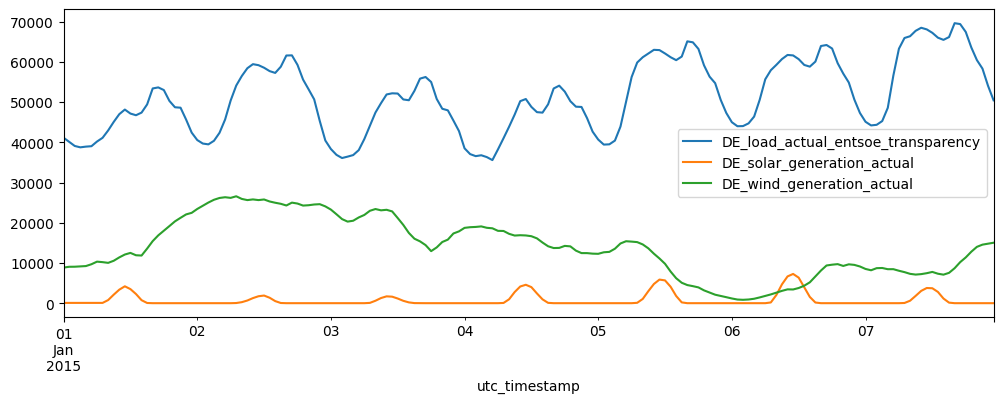

In [51]:
de_imp[["DE_load_actual_entsoe_transparency",
        "DE_solar_generation_actual",
        "DE_wind_generation_actual"]].iloc[:24*7].plot(figsize=(12,4))


In [52]:
import numpy as np

# If your current dataframe is called de_1519, de_country_1519, etc. adjust the name here:
de_1519_clean = de_country_1519  

nonneg_cols = [
    "DE_load_actual_entsoe_transparency",
    "DE_load_forecast_entsoe_transparency",
    "DE_solar_generation_actual",
    "DE_wind_generation_actual",
    "DE_wind_offshore_generation_actual",
    "DE_wind_onshore_generation_actual",
    "DE_solar_capacity",
    "DE_wind_capacity",
    "DE_wind_offshore_capacity",
    "DE_wind_onshore_capacity",
]

neg_mask = (de_1519_clean[nonneg_cols] < 0)
neg_counts = neg_mask.sum()

print("Negative counts per column:")
print(neg_counts[neg_counts > 0])


Negative counts per column:
Series([], dtype: int64)


In [61]:
import pandas as pd
import numpy as np

# If your df is named differently, change this line:
df = de_imp  

n_rows = len(df)

summary_rows = []

for col in df.columns:
    s = df[col]
    
    n_missing = s.isna().sum()
    missing_ratio = n_missing / n_rows
    
    if pd.api.types.is_numeric_dtype(s):
        n_negative = (s < 0).sum()
        n_zero = (s == 0).sum()
        min_val = s.min()
        max_val = s.max()
        mean_val = s.mean()
        std_val = s.std()
    else:
        n_negative = np.nan
        n_zero = np.nan
        min_val = s.min()
        max_val = s.max()
        mean_val = np.nan
        std_val = np.nan
    
    summary_rows.append({
        "column": col,
        "dtype": s.dtype,
        "n_missing": n_missing,
        "missing_ratio": round(missing_ratio, 6),
        "n_negative": n_negative,
        "n_zero": n_zero,
        "min": min_val,
        "max": max_val,
        "mean": mean_val,
        "std": std_val,
    })

quality_summary = (
    pd.DataFrame(summary_rows)
      .set_index("column")
      .sort_values("missing_ratio", ascending=False)
)

quality_summary


,dtype,n_missing,missing_ratio,n_negative,n_zero,min,max,mean,std
column,,,,,,,,,
DE_load_actual_entsoe_transparency,float64,0,0.0,0,0,31307.0000,77549.0000,55859.295044,10005.619850
DE_load_forecast_entsoe_transparency,float64,0,0.0,0,0,28824.0000,75912.0000,54994.108616,9485.448638
DE_solar_capacity,float64,0,0.0,0,0,37248.0000,50508.0000,42382.770035,4309.517055
DE_solar_generation_actual,float64,0,0.0,0,19058,0.0000,30028.0000,4294.460592,6599.378011
DE_solar_profile,float64,0,0.0,0,19571,0.0000,0.6873,0.101605,0.155587
DE_wind_capacity,float64,0,0.0,0,0,27913.0000,50452.0000,39978.860054,7264.878538
DE_wind_generation_actual,float64,0,0.0,0,0,135.0000,45085.0000,11160.367949,8690.409369
DE_wind_profile,float64,0,0.0,0,0,0.0038,1.0000,0.279197,0.211489
DE_wind_offshore_capacity,float64,0,0.0,0,0,667.0000,5742.0000,3262.498585,1360.050663


In [62]:
def quality_ok(row):
    return (
        row["n_missing"] == 0
        and row["n_negative"] == 0
        and row["min"] >= 0
    )

quality_summary["quality_ok"] = quality_summary.apply(quality_ok, axis=1)

display(quality_summary)

print("\nColumns failing quality_ok:")
display(quality_summary[~quality_summary["quality_ok"]])


,dtype,n_missing,missing_ratio,n_negative,n_zero,min,max,mean,std,quality_ok
column,,,,,,,,,,
DE_load_actual_entsoe_transparency,float64,0,0.0,0,0,31307.0000,77549.0000,55859.295044,10005.619850,True
DE_load_forecast_entsoe_transparency,float64,0,0.0,0,0,28824.0000,75912.0000,54994.108616,9485.448638,True
DE_solar_capacity,float64,0,0.0,0,0,37248.0000,50508.0000,42382.770035,4309.517055,True
DE_solar_generation_actual,float64,0,0.0,0,19058,0.0000,30028.0000,4294.460592,6599.378011,True
DE_solar_profile,float64,0,0.0,0,19571,0.0000,0.6873,0.101605,0.155587,True
DE_wind_capacity,float64,0,0.0,0,0,27913.0000,50452.0000,39978.860054,7264.878538,True
DE_wind_generation_actual,float64,0,0.0,0,0,135.0000,45085.0000,11160.367949,8690.409369,True
DE_wind_profile,float64,0,0.0,0,0,0.0038,1.0000,0.279197,0.211489,True
DE_wind_offshore_capacity,float64,0,0.0,0,0,667.0000,5742.0000,3262.498585,1360.050663,True



Columns failing quality_ok:


,dtype,n_missing,missing_ratio,n_negative,n_zero,min,max,mean,std,quality_ok
column,,,,,,,,,,


In [64]:
print(de_imp.index.is_monotonic_increasing)
print(de_imp.index.freq)   # may be None, but that’s okay


True
None


In [65]:
dup_count = de_imp.index.duplicated().sum()
print("Duplicate timestamps:", dup_count)


Duplicate timestamps: 0


In [66]:
# Reset index so utc_timestamp becomes a column in the file
de_final = de_imp.reset_index()   # index -> column 'utc_timestamp'

# CSV
de_final.to_csv("de_60min_2015_2019_clean.csv", index=False)

# Parquet (recommended for modelling)
de_final.to_parquet("de_60min_2015_2019_clean.parquet", index=False)


In [67]:
test = pd.read_parquet("de_60min_2015_2019_clean.parquet")
print(test.shape)
print(test.head())


(43824, 15)
              utc_timestamp  DE_load_actual_entsoe_transparency  \
0 2015-01-01 00:00:00+00:00                             41151.0   
1 2015-01-01 01:00:00+00:00                             40135.0   
2 2015-01-01 02:00:00+00:00                             39106.0   
3 2015-01-01 03:00:00+00:00                             38765.0   
4 2015-01-01 04:00:00+00:00                             38941.0   

   DE_load_forecast_entsoe_transparency  DE_solar_capacity  \
0                               39723.0            37248.0   
1                               38813.0            37248.0   
2                               38490.0            37248.0   
3                               38644.0            37248.0   
4                               38773.0            37248.0   

   DE_solar_generation_actual  DE_solar_profile  DE_wind_capacity  \
0                        71.0            0.0019           27913.0   
1                        71.0            0.0019           27913.0   
2    